In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from MLP import *
from gridSearch import *

In [2]:
data = pd.read_csv('cup/ML-CUP20-TR.csv',sep=',',index_col=0)
data = data.to_numpy()

sep=1000 #separator training set - validation set
tx = data[:sep,:-2]
ty = data[:sep,-2:]
vx = data[sep:,:-2]
vy = data[sep:,-2:]

tx.shape, ty.shape

((1000, 10), (1000, 2))

In [3]:
n = MLP(  Nodes=[10,30,30,2], f='tanh', f_out='ide', w_range=.7)
print('init', n.error(tx,ty))


init 1820.1687751323313


5.311498886465066 6.787972224499829


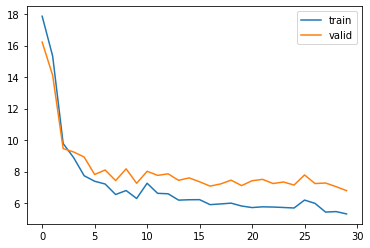

In [4]:
# care: if bs is small it's better to use high measure_interval as the error tends to zig-zag
n.train(tx, ty, 1e-02,
  a = 5e-01,
  l = 1e-4,
  max_epochs = 30,
  tresh = .05,
  bs=30,
  val_x= vx, val_y=vy )
clear_output()

plt.plot(n.train_history,label = 'train')
plt.plot(n.valid_history,label = 'valid')
plt.legend()
print( n.error( tx , ty), n.error( vx , vy ) )

In [31]:
n.MED(vx,vy)

2.989464446027815